In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Step 1: Load the processed dataset
file_path = '../data/final_team_cluster_data2.csv'
final_team_cluster_data = pd.read_csv(file_path)

In [5]:
# Add league labels
matches_file_path = '../data/ginf.csv'
matches_data = pd.read_csv(matches_file_path)
team_league_map = pd.concat([matches_data[['ht', 'league']], matches_data[['at', 'league']].rename(columns={'at': 'ht'})])
team_league_map = team_league_map.drop_duplicates().set_index('ht')['league'].to_dict()
final_team_cluster_data['league'] = final_team_cluster_data['event_team'].map(team_league_map)


In [6]:
# Prepare data
y = final_team_cluster_data['league']
y_actual = y.copy()

In [7]:
# Step 2: Generate random predictions
np.random.seed(42)
random_predictions = np.random.choice(y.unique(), size=len(y))

In [8]:
# Step 3: Evaluate
accuracy = accuracy_score(y_actual, random_predictions)
f1 = f1_score(y_actual, random_predictions, average='weighted')

In [9]:
print(f"Random Chance Accuracy: {accuracy:.2f}")
print(f"Random Chance F1-Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_actual, random_predictions))

Random Chance Accuracy: 0.21
Random Chance F1-Score: 0.21

Classification Report:
              precision    recall  f1-score   support

          D1       0.20      0.23      0.21        26
          E0       0.12      0.15      0.13        26
          F1       0.28      0.23      0.25        30
          I1       0.26      0.23      0.25        30
         SP1       0.23      0.20      0.21        30

    accuracy                           0.21       142
   macro avg       0.22      0.21      0.21       142
weighted avg       0.22      0.21      0.21       142



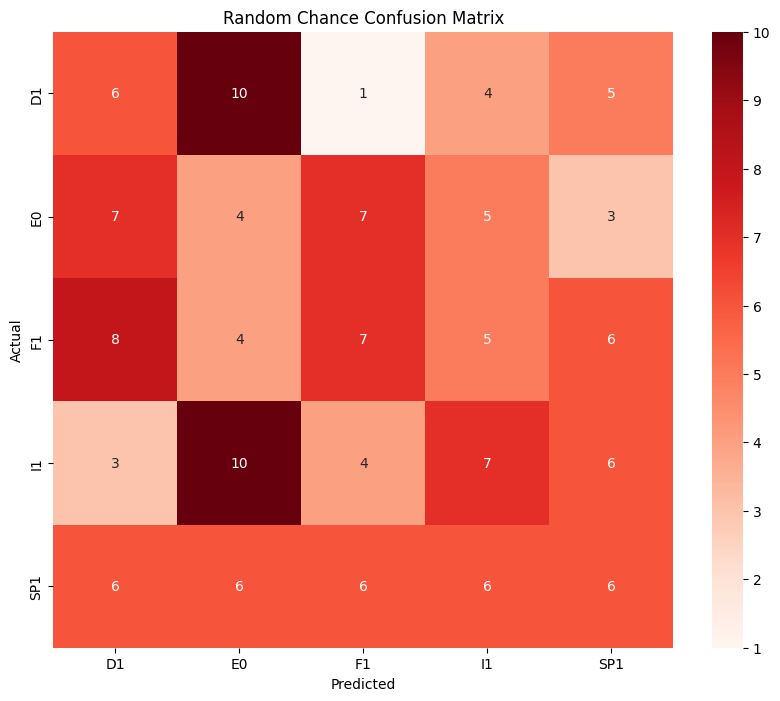

In [10]:
# Confusion matrix
conf_matrix = confusion_matrix(y_actual, random_predictions, labels=np.unique(y))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=np.unique(y), yticklabels=np.unique(y), cmap="Reds")
plt.title("Random Chance Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()